# Comparing Ground Truth with Gridded Products

## 1. The Weather Company

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import date, datetime, timedelta
import requests
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
font = {'size'   : 12}
matplotlib.rc('font', **font)

pd.plotting.register_matplotlib_converters()

In [2]:
from lib.wx_utilities import *

In [3]:
# Some attributes of this site
lat, long, start, end = (41.17932065372352, -96.44152082846212, '2018-05-09', '2018-10-15')

In [4]:
# Read Device Data
df = pd.read_csv('dat/UNLCSP-3_daily.csv')
df['UTC'] = pd.to_datetime(df['UTC'], utc=True)

In [5]:
# Make a Backbone
df2 = pd.DataFrame()
df2['date'] = pd.date_range(start=start, end=end, freq="D", tz="UTC")

In [6]:
# Fetch TWC Gridded
wdf = pd.read_csv('dat/UNLCSP-3_twc.csv')
wdf = rename_wx_daily_for_merge(wdf)
wdf['date'] = pd.to_datetime(wdf['date'], utc=True)

In [7]:
# Merge everything
df2 = df2.merge(df, left_index=False, right_index=False, left_on='date',right_on='UTC', how='left')
df2 = df2.merge(wdf, left_on='date',right_on='date', how='left')

In [8]:
df2

,date,tenant,site_id,UTC,device,Tmean,Tmin,Tmax,Precip_1d,SWdw_sum,...,RH_min_twc,RH_max_twc,P_twc,SLP_twc,U_twc,Udir_twc,Precip_1d_twc,Snow_1d,SWdw_sum_twc,ETo_sum_twc
0,2018-05-09 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-05-09 00:00:00+00:00,A000653,NaN,NaN,NaN,0.855823,NaN,...,0.38,0.81,96.46,100.85,4.4,304,0.00000,0.0,7768,5.688
1,2018-05-10 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-05-10 00:00:00+00:00,A000653,19.55130,11.800400,26.60110,0.551158,27.94720,...,0.42,0.83,96.74,101.14,3.1,139,0.00000,0.0,7602,5.448
2,2018-05-11 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-05-11 00:00:00+00:00,A000653,14.75750,8.726610,19.48830,7.674270,12.97740,...,0.53,0.87,96.36,100.77,4.8,60,0.00254,0.0,7652,5.184
3,2018-05-12 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-05-12 00:00:00+00:00,A000653,12.16880,9.956080,14.20760,1.124920,6.97329,...,0.61,0.88,96.72,101.19,4.6,34,0.04300,0.0,3731,3.720
4,2018-05-13 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-05-13 00:00:00+00:00,A000653,15.38680,11.576700,23.73440,0.002019,18.48020,...,0.58,0.94,96.91,101.37,2.4,43,0.05500,0.0,4901,4.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2018-10-11 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-10-11 00:00:00+00:00,A000653,5.60649,3.060660,15.12980,NaN,12.14480,...,0.52,0.80,97.43,102.09,4.3,308,0.01600,0.1,4768,2.088
157,2018-10-12 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-10-12 00:00:00+00:00,A000653,5.72364,1.765050,13.31460,NaN,3.03107,...,0.66,1.00,97.22,101.86,1.4,194,0.86200,0.0,1269,0.816
158,2018-10-13 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-10-13 00:00:00+00:00,A000653,8.49645,0.732511,18.36420,NaN,17.02170,...,0.62,0.99,96.70,101.25,3.8,209,0.00000,0.0,4497,2.136
159,2018-10-14 00:00:00+00:00,franz-hydro,UNLCSP-3,2018-10-14 00:00:00+00:00,A000653,2.60655,-0.047098,9.80053,NaN,3.24226,...,0.84,0.96,97.15,101.79,5.4,217,0.97800,6.1,1021,0.864


# Compare Different Data Sources

Text(0, 0.5, 'Temp Difference')

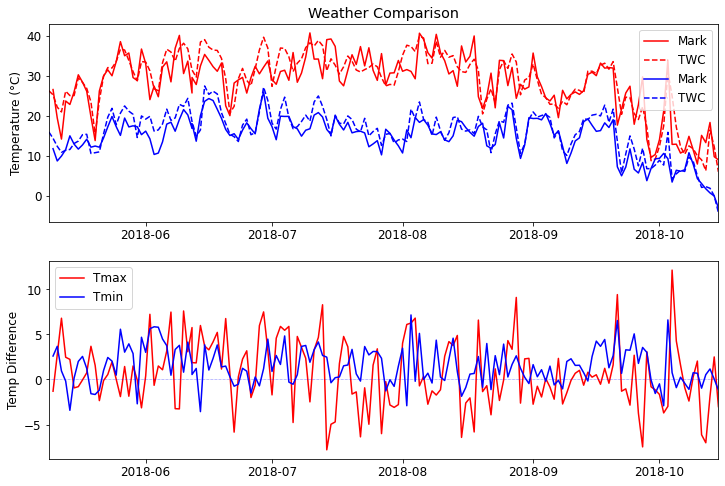

In [9]:
# Temperature Compare
xlim = [pd.to_datetime(start), pd.to_datetime(end)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

# Date versus Temp
line1 = axes[0].plot(df2.date, df2.Tmax, c='r', label = 'Mark')
line1 = axes[0].plot(df2.date, df2.Tmax_twc, c='r', ls='--', label = 'TWC')

line1 = axes[0].plot(df2.date, df2.Tmin, c='b', label = 'Mark')
line1 = axes[0].plot(df2.date, df2.Tmin_twc, c='b', ls='--', label = 'TWC')

ylim = axes[0].get_ylim()    

axes[0].set_xlim(xlim)    
axes[0].set_ylim(ylim)    
axes[0].legend()
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Weather Comparison')

# Date versus Temp Difference
line1 = axes[1].plot(df2.date, df2.Tmax_twc-df2.Tmax, c='r', label = 'Tmax')
line1 = axes[1].plot(df2.date, df2.Tmin_twc-df2.Tmin, c='b', label = 'Tmin')
line1, = axes[1].plot(xlim, [0, 0], c='b', lw=0.5, ls=':')

ylim = axes[1].get_ylim()    

axes[1].set_xlim(xlim)    
axes[1].set_ylim(ylim)    
axes[1].legend()
axes[1].set_ylabel('Temp Difference')

Text(0, 0.5, 'Precip (mm)')

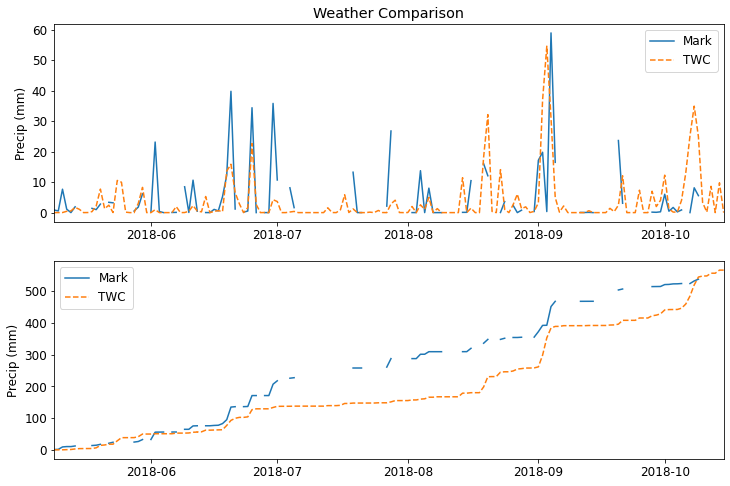

In [10]:
# Precip Compare
xlim = [pd.to_datetime(start), pd.to_datetime(end)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

# Date versus Rain
line1 = axes[0].plot(df2.date, df2.Precip_1d, c='C0', label = 'Mark')
line1 = axes[0].plot(df2.date, df2.Precip_1d_twc*10, c='C1', ls='--', label = 'TWC')

ylim = axes[0].get_ylim()    

axes[0].set_xlim(xlim)    
axes[0].set_ylim(ylim)    
axes[0].legend()
axes[0].set_ylabel('Precip (mm)')
axes[0].set_title('Weather Comparison')

# Cumulative Rain
line1 = axes[1].plot(df2.date, np.cumsum(df2.Precip_1d), c='C0', label = 'Mark')
line1 = axes[1].plot(df2.date, np.cumsum(df2.Precip_1d_twc*10), c='C1', ls='--', label = 'TWC')

ylim = axes[1].get_ylim()    

axes[1].set_xlim(xlim)    
axes[1].set_ylim(ylim)    
axes[1].legend()
axes[1].set_ylabel('Precip (mm)')

# Exercises

1. What is the mean difference and root mean square error of the daily temperature max and min?

2. If harvest time was 1750 degree days, how many days different would that be between TWC and Mark?

    This code may come in useful:
    ```python
from lib.biology import *
# The column names can be changed to use the TWC temperatures instead
df2['GDD'] = GDD(df2, Tlo=10., Thi=44., method='II', Tmincol='Tmin', Tmaxcol='Tmax') 
df2['GDD'] = np.cumsum(df2['GDD'])
    ```


3. Open the file dat/CSP-3_2018.csv.  What are the GDD thresholds for the different growth stages?

    This code may come in useful:
    ```python
obs = pd.read_csv('dat/CSP-3_2018.csv')
obs['date'] = pd.to_datetime('2018-01-01') + obs['doy'].map(timedelta)
    ```